In [2]:
# Modified from https://www.youtube.com/watch?v=4M2aiHvhr5Y&t=40s
# pip install cartopy

import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as cfeature
from cartopy import config
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER

c:\Users\brely\anaconda3\lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


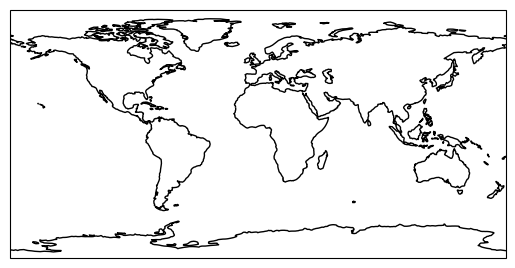

In [3]:
map1 = plt.axes(projection=ccrs.PlateCarree())
map1.coastlines()

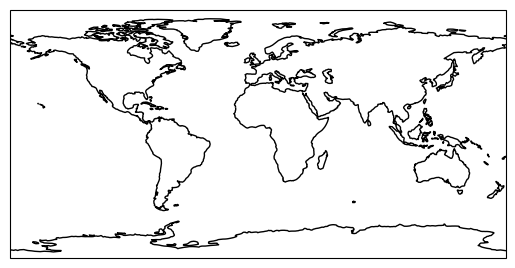

In [4]:
fig = plt.figure()
map2 = fig.add_subplot(projection=ccrs.PlateCarree())
map2.coastlines()

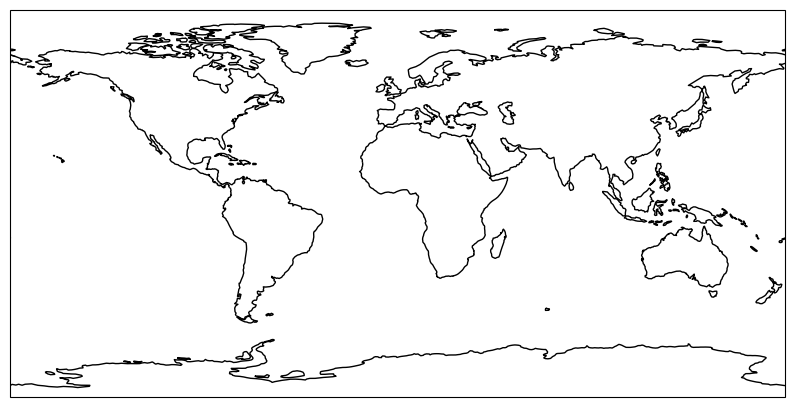

In [5]:
fig = plt.figure(figsize=(10,10))
map3 = fig.add_subplot(projection=ccrs.PlateCarree())
map3.coastlines()

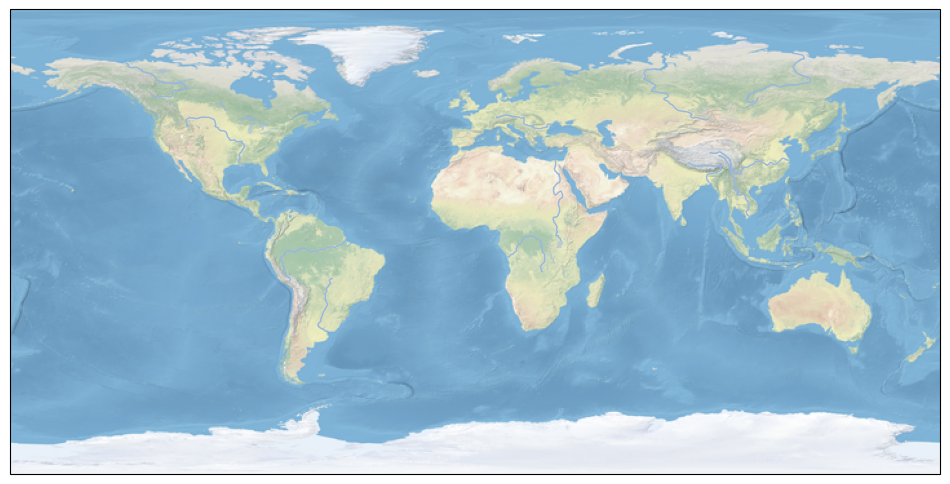

In [17]:
# This uses all the features, except "STATE"
# https://scitools.org.uk/cartopy/docs/latest/matplotlib/feature_interface.html

plt.figure(figsize=(12,12))
map4 = plt.axes(projection=ccrs.PlateCarree())
map4.add_feature(cfeature.LAND) # Adds green for land
map4.add_feature(cfeature.OCEAN) # Adds blue for water
#map4.add_feature(cfeature.COASTLINE) # Adds black border around coastline
#map4.add_feature(cfeature.BORDERS, linestyle=":") # Adds lines for country borders
map4.add_feature(cfeature.LAKES, alpha=0.5) # Adds lakes
map4.add_feature(cfeature.RIVERS) # Adds rivers

map4.stock_img() # Makes the map look more real

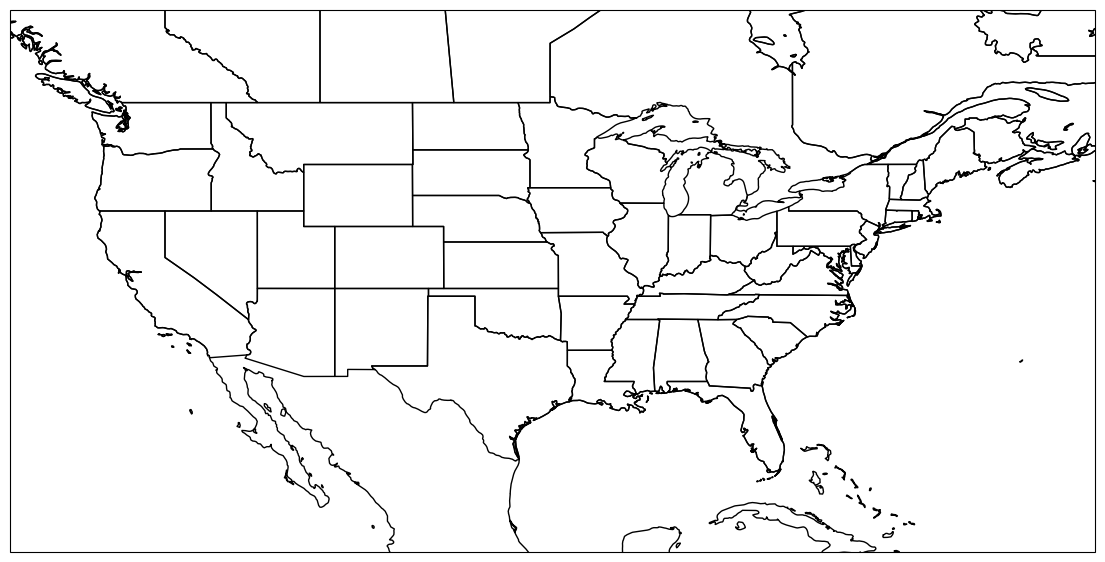

In [23]:
fig = plt.figure(figsize=(14,14))
map5 = plt.axes(projection=ccrs.PlateCarree())
map5.set_extent([-130,-60,20,55], ccrs.PlateCarree())
map5.add_feature(cfeature.STATES) # Shows the lines for each state in the US
map5.coastlines() # Without this line, it does not show Mexico


In [ ]:
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.feature as cfeature


def main():
    fig = plt.figure(figsize=[10, 5])
    ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.SouthPolarStereo())
    ax2 = fig.add_subplot(1, 2, 2, projection=ccrs.SouthPolarStereo(),
                          sharex=ax1, sharey=ax1)
    fig.subplots_adjust(bottom=0.05, top=0.95,
                        left=0.04, right=0.95, wspace=0.02)

    # Limit the map to -60 degrees latitude and below.
    ax1.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())

    ax1.add_feature(cfeature.LAND)
    ax1.add_feature(cfeature.OCEAN)

    ax1.gridlines()
    ax2.gridlines()

    ax2.add_feature(cfeature.LAND)
    ax2.add_feature(cfeature.OCEAN)

    # Compute a circle in axes coordinates, which we can use as a boundary
    # for the map. We can pan/zoom as much as we like - the boundary will be
    # permanently circular.
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)

    ax2.set_boundary(circle, transform=ax2.transAxes)

    plt.show()